In [1]:
pip install plotly_express==0.4.0


     |████████████████████████████████| 13.2 MB 4.1 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=7c3589fabe7b5d7dccce216397b692524daeb83015725d8809ff7ad01ff6bbef
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing lib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


1. Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label

In [4]:
#reading dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(df.shape)

(1338, 7)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:

# performing a correlation test

df_dummies = pd.get_dummies(df)

df_dummies.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [26]:
import plotly.express as px
fig1 = px.histogram(df, x="age", nbins = 20)
fig1.show()


In [16]:
# generating a list of numerical variables 
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['age', 'bmi', 'children', 'charges']

In [17]:
#numerical discrete into a list named numerical_discrete
numerical_discrete = []

for var in numerical:
    if len(df[var].unique())<20 :
        print(var, ' values: ', df[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

#Numerical_discrete column  list
numerical_discrete

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


['children']

In [18]:
# numerical continous into a list named continuous_discrete

numerical_continuous = [var for var in numerical if var not in numerical_discrete and var not in [ 'charges']]
#column list continuous discrete
numerical_continuous

['age', 'bmi']

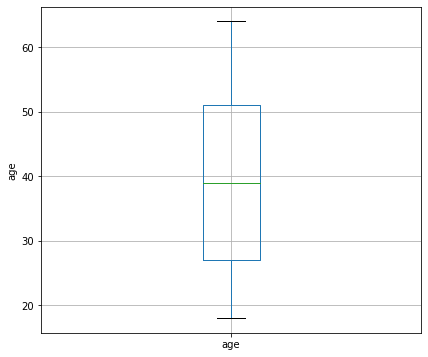

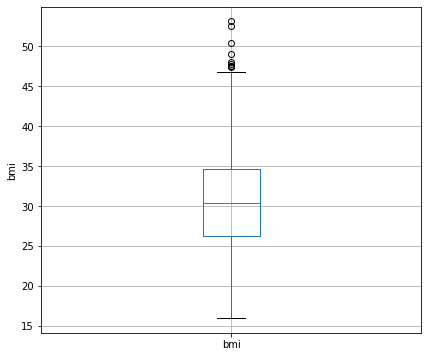

In [19]:
#visualization to denote outliers using a boxplot
for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)

In [27]:
#resolving outliers 
from scipy import stats
df_numerical_continuous= df[["bmi", "age"]]
z = np.abs(stats.zscore( df_numerical_continuous))
print(z)

[[0.45332    1.43876426]
 [0.5096211  1.50996545]
 [0.38330685 0.79795355]
 ...
 [1.0148781  1.50996545]
 [0.79781341 1.29636188]
 [0.26138796 1.55168573]]


In [28]:
#identify outliers with threshold
threshold = 3
print(np.where(z > 3))

(array([ 116,  847, 1047, 1317]), array([0, 0, 0, 0]))


In [30]:
#filtering out data with no outliersoutliers from the continuous data

abs_z = np. abs(z)
filtered_entries = (abs_z < 3). all(axis=1)
new_df_numerical_continuous = df_numerical_continuous[filtered_entries]
print(new_df_numerical_continuous)
new_df_numerical_continuous.shape

         bmi  age
0     27.900   19
1     33.770   18
2     33.000   28
3     22.705   33
4     28.880   32
...      ...  ...
1333  30.970   50
1334  31.920   18
1335  36.850   18
1336  25.800   21
1337  29.070   61

[1334 rows x 2 columns]


(1334, 2)

In [31]:
#histogram of bmi in new_df_numerical_continuous
fig = px.histogram(new_df_numerical_continuous, x="bmi")
fig.show()

In [39]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [40]:
# categorical list that has been isolated
categorical

['sex', 'smoker', 'region']

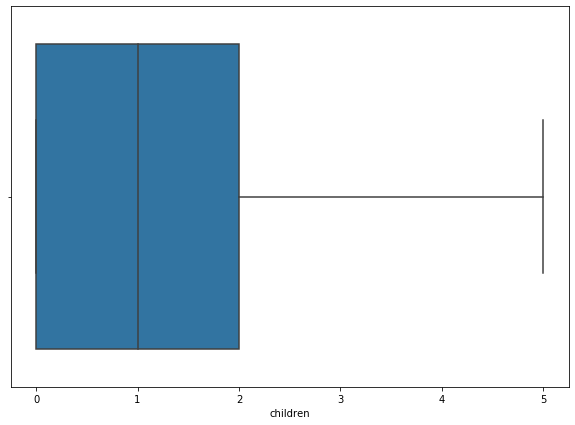

In [42]:
#Detect and remove outliers: Discrete: children

plt.figure(figsize=(10,7))
sns.boxplot(df.children)

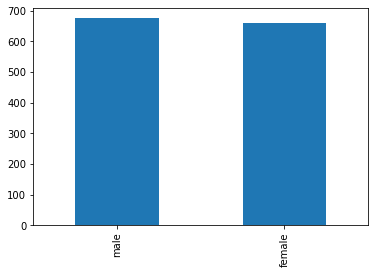

In [43]:
#categorical features
df['sex'].value_counts().plot(kind='bar')

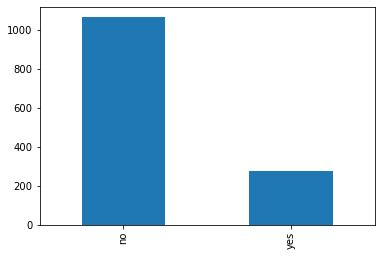

In [45]:
df['smoker'].value_counts().plot(kind='bar')

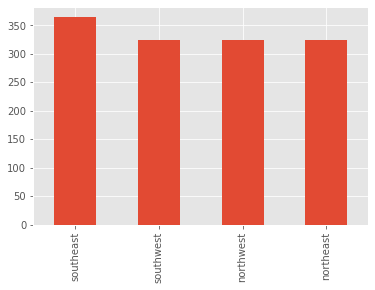

In [55]:
df['region'].value_counts().plot(kind='bar')


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#sex
df.sex = le.fit_transform(df.sex)
#smoker
df.smoker = le.fit_transform(df.smoker)
#region
df.region = le.fit_transform(df.region)
#children
df.children = le.fit_transform(df.children)



df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [58]:
# Create X (all the feature columns)
X = df.drop("charges", axis=1)

# Create y (the target column)
Y = df["charges"]
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [59]:
#Check corellation to determine which variable affects charges the least
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [61]:
#Drop unnecessary columns in this case region

#axis 1 - columns
#axis 0 - rows
X = X.drop(['region'], axis=1)
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
